In [11]:
import pandas as pd
import re
from datetime import datetime

In [13]:
log_file = 'access.log'

log_pattern = re.compile(r'(?P<host>\S+) - - \[(?P<time>.*?)\] "(?P<request>.*?)" (?P<status>\d{3}) (?P<size>\S+)')

def parse_log_file(filepath):
    logs = []
    with open(filepath, 'r') as file:
        for line in file:
            match = log_pattern.match(line)
            if match:
                log_data = match.groupdict()
                logs.append(log_data)
    return logs

logs = parse_log_file(log_file)
df = pd.DataFrame(logs)

In [15]:
df['time'] = pd.to_datetime(df['time'], format='%d/%b/%Y:%H:%M:%S %z')
df['size'] = pd.to_numeric(df['size'], errors='coerce')
df['status'] = pd.to_numeric(df['status'], errors='coerce')

In [16]:
def extract_method(request):
    parts = request.split(' ')
    return parts[0] if len(parts) > 0 else None

def extract_url(request):
    parts = request.split(' ')
    return parts[1] if len(parts) > 1 else None

def extract_protocol(request):
    parts = request.split(' ')
    return parts[2] if len(parts) > 2 else None

In [17]:
df['method'] = df['request'].apply(extract_method)
df['url'] = df['request'].apply(extract_url)
df['protocol'] = df['request'].apply(extract_protocol)

df.drop(columns=['request'], inplace=True)

print(df.head())

                host                      time  status    size method  \
0  in24.inetnebr.com 1995-08-01 00:00:01-04:00     200  1839.0    GET   
1    uplherc.upl.com 1995-08-01 00:00:07-04:00     304     0.0    GET   
2    uplherc.upl.com 1995-08-01 00:00:08-04:00     304     0.0    GET   
3    uplherc.upl.com 1995-08-01 00:00:08-04:00     304     0.0    GET   
4    uplherc.upl.com 1995-08-01 00:00:08-04:00     304     0.0    GET   

                                               url  protocol  
0  /shuttle/missions/sts-68/news/sts-68-mcc-05.txt  HTTP/1.0  
1                                                /  HTTP/1.0  
2                       /images/ksclogo-medium.gif  HTTP/1.0  
3                     /images/MOSAIC-logosmall.gif  HTTP/1.0  
4                        /images/USA-logosmall.gif  HTTP/1.0  


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
print(df.describe())

             status          size
count  1.569898e+06  1.555720e+06
mean   2.119441e+02  1.724497e+04
std    3.507420e+01  6.824404e+04
min    2.000000e+02  0.000000e+00
25%    2.000000e+02  6.690000e+02
50%    2.000000e+02  3.260000e+03
75%    2.000000e+02  9.391000e+03
max    5.010000e+02  3.421948e+06


In [25]:
print(df['host'].value_counts().head(10))

host
edams.ksc.nasa.gov      6530
piweba4y.prodigy.com    4846
163.206.89.4            4791
piweba5y.prodigy.com    4607
piweba3y.prodigy.com    4416
www-d1.proxy.aol.com    3889
www-b2.proxy.aol.com    3534
www-b3.proxy.aol.com    3463
www-c5.proxy.aol.com    3423
www-b5.proxy.aol.com    3411
Name: count, dtype: int64


In [27]:
print(df['url'].value_counts().head(10))

url
/images/NASA-logosmall.gif                 97410
/images/KSC-logosmall.gif                  75337
/images/MOSAIC-logosmall.gif               67448
/images/USA-logosmall.gif                  67068
/images/WORLD-logosmall.gif                66444
/images/ksclogo-medium.gif                 62778
/ksc.html                                  43687
/history/apollo/images/apollo-logo1.gif    37826
/images/launch-logo.gif                    35138
/                                          30347
Name: count, dtype: int64


In [29]:
print(df['method'].value_counts())

method
GET                        1565812
HEAD                          3965
POST                           111
±‰6‍ےT7‰FأاF               4
‎ري.ٹ2ي.‹>î                     2
€|t°9أ°'أ€|u&÷G          2
huttle/countdown/                1
?                                1
Name: count, dtype: int64


In [31]:
print(df['status'].value_counts())

status
200    1398988
304     134146
302      26497
404      10056
403        171
501         27
400         10
500          3
Name: count, dtype: int64


In [33]:
traffic_over_time = df.resample('H', on='time').size()
print(traffic_over_time.head())

C:\Users\Elbraa\AppData\Local\Temp\ipykernel_17668\220049659.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  traffic_over_time = df.resample('H', on='time').size()


time
1995-08-01 00:00:00-04:00    1642
1995-08-01 01:00:00-04:00    1385
1995-08-01 02:00:00-04:00     993
1995-08-01 03:00:00-04:00    1219
1995-08-01 04:00:00-04:00     985
Freq: h, dtype: int64


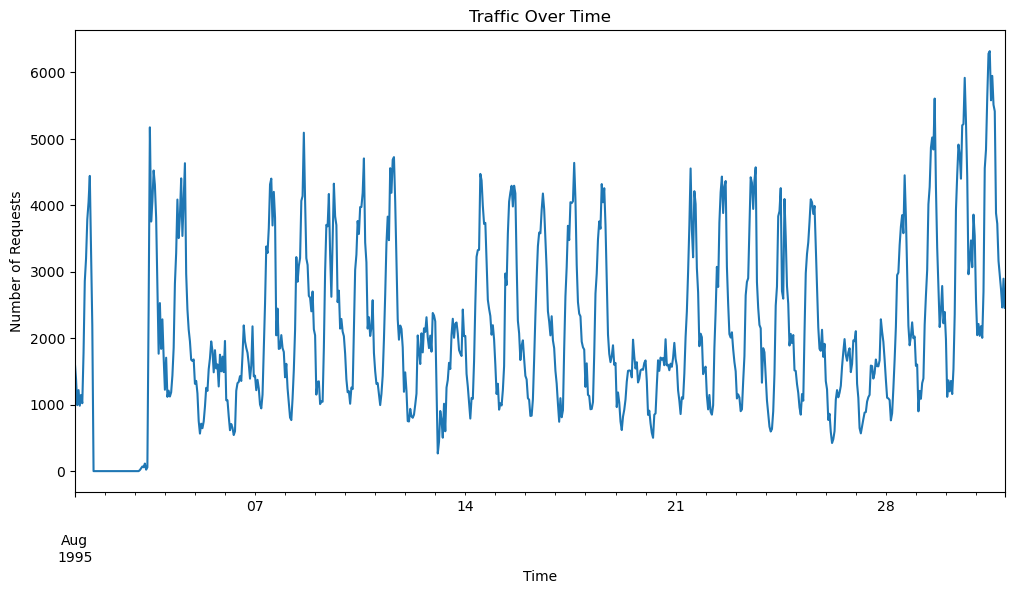

In [35]:
plt.figure(figsize=(12, 6))
traffic_over_time.plot()
plt.title('Traffic Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Requests')
plt.show()

C:\Users\Elbraa\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Elbraa\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Elbraa\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 1746 (\N{ARABIC LETTER YEH BARREE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Elbraa\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Elbraa\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 16 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Elbraa\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 1 () m

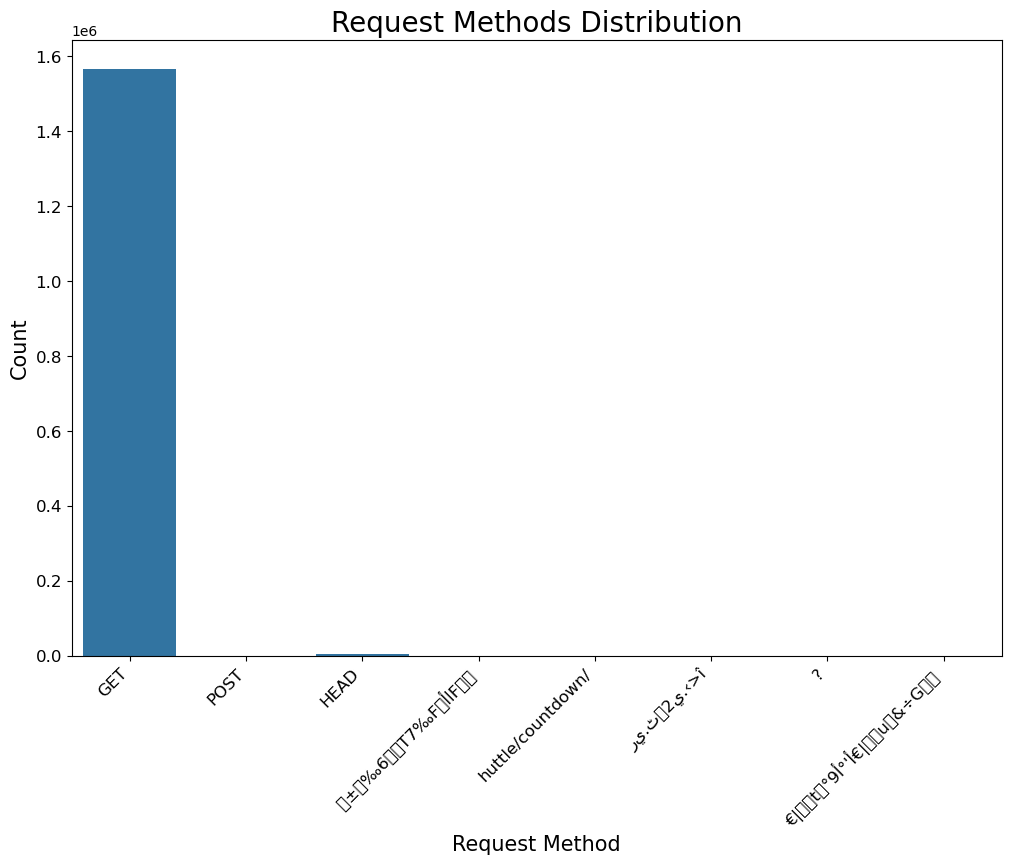

In [55]:
plt.figure(figsize=(12, 8))   
sns.countplot(x='method', data=df)
plt.title('Request Methods Distribution', fontsize=20)
plt.xlabel('Request Method', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(fontsize=12, rotation=45, ha='right')   
plt.yticks(fontsize=12)
plt.show()

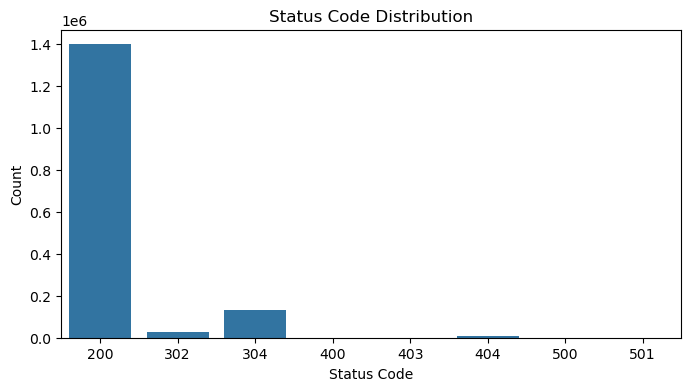

In [39]:
plt.figure(figsize=(8, 4))
sns.countplot(x='status', data=df)
plt.title('Status Code Distribution')
plt.xlabel('Status Code')
plt.ylabel('Count')
plt.show()

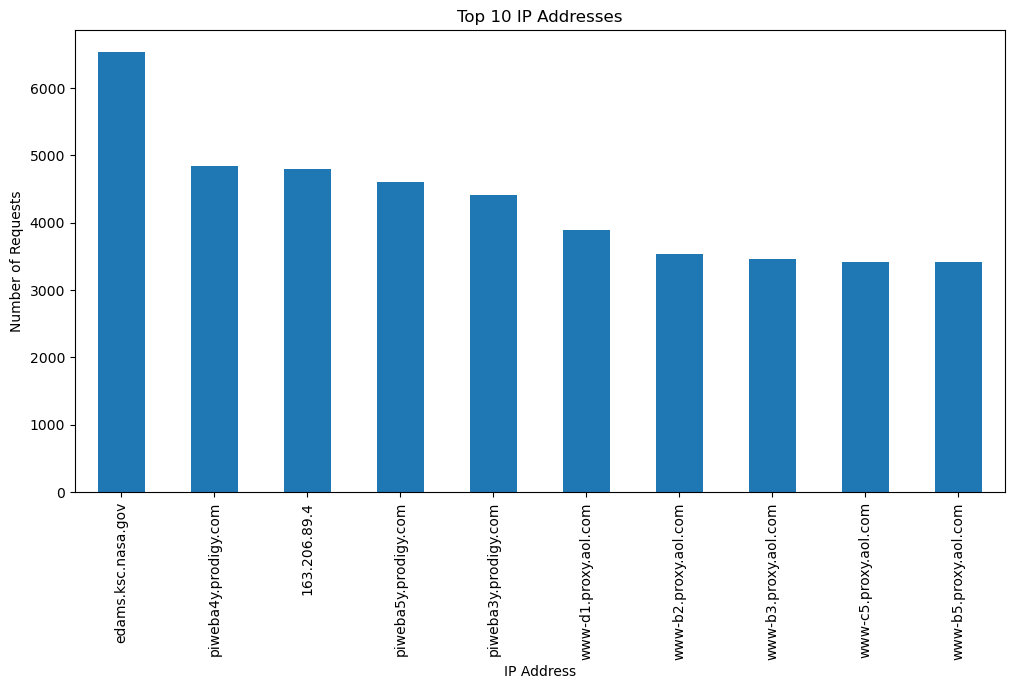

In [41]:
plt.figure(figsize=(12, 6))
df['host'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 IP Addresses')
plt.xlabel('IP Address')
plt.ylabel('Number of Requests')
plt.show()